# Food recipes analysis
My project is about food recipe analysis and recommendation, and with possible extension further. Data contains both recipes and user reviews of the recipe. The idea is to first to explore data with possible trends in types of meals prevalent in certain periods because data has 18 years of history. Also, analyze the user behavior such as 1) how often users rate recipes higher when it was rated lower before or vice versa (peer pressure). This exploratory part is the most important part of the project. If time permits, I will work on food recipe recommendations. This is a secondary aim because this algorithm was researched in the attached paper in Kaggle. Data is used in:

Generating Personalized Recipes from Historical User Preferences  
Bodhisattwa Prasad Majumder*, Shuyang Li*, Jianmo Ni, Julian McAuley
EMNLP, 2019  
https://arxiv.org/pdf/1909.00105.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()
%matplotlib inline

In [2]:
raw_recipes = pd.read_csv("..//data//RAW_recipes.csv")
raw_interactions = pd.read_csv("..//data//RAW_interactions.csv")

In [3]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [4]:
number_of_recipes = raw_recipes.shape[0]
print(f"number of recipes is equal to {number_of_recipes}")

number of recipes is equal to 231637


In [5]:
number_of_reviews = raw_interactions.shape[0]
print(f"number of reviews is equal to {number_of_reviews}")

number of reviews is equal to 1132367


### Users mostly rated only one recipe

95% quantile is equal to 11.0
max # of review given by 1 user is equal to 7671


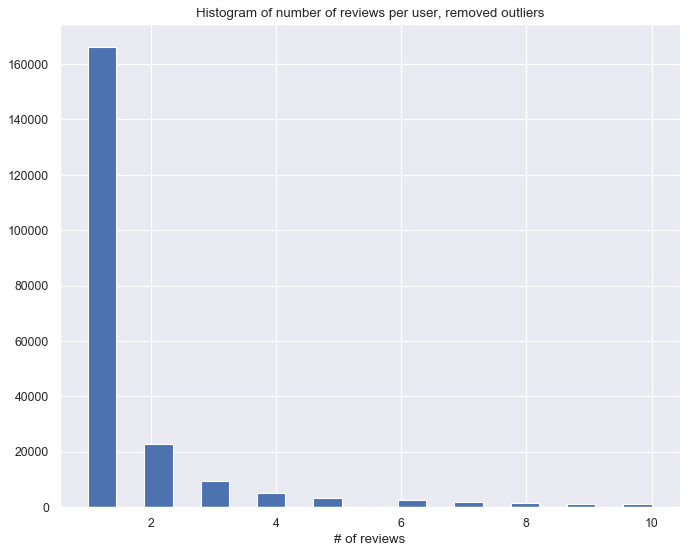

In [6]:
n_of_review_per_user = raw_interactions.groupby(["user_id"]).agg('count')['recipe_id']
q_095 = n_of_review_per_user.quantile(0.95)
max_n_of_review = n_of_review_per_user.max()
fig = plt.figure(figsize = (10,8), dpi = 80)
ax = fig.add_subplot(111)
plt.hist(n_of_review_per_user.loc[n_of_review_per_user < q_095], bins = 20)
ax.set_title("Histogram of number of reviews per user, removed outliers")
ax.set_xlabel("# of reviews")
print(f"95% quantile is equal to {q_095}")
print(f"max # of review given by 1 user is equal to {max_n_of_review}")

### Users tend to be positive about recipes

Text(0, 0.5, '# of reviews')

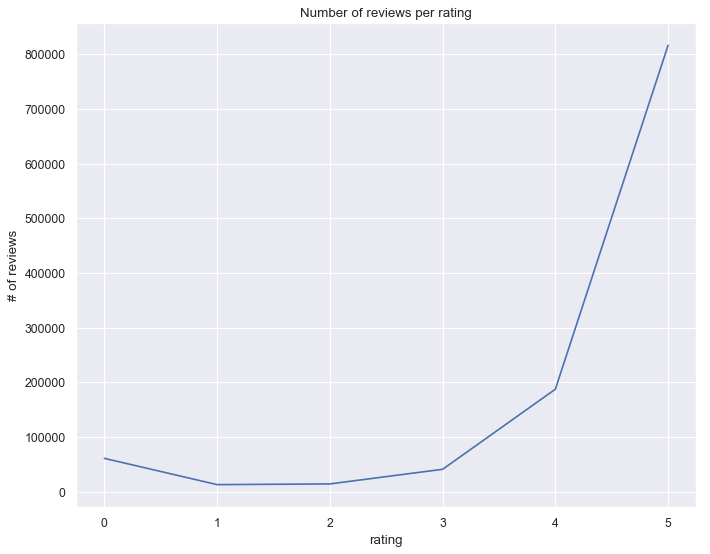

In [15]:
n_of_review_per_rating = raw_interactions.groupby(["rating"]).agg('count')['recipe_id']
fig = plt.figure(figsize = (10,8), dpi = 80)
ax = fig.add_subplot(111)
plt.plot(n_of_review_per_rating)
ax.set_title("Number of reviews per rating")
ax.set_xlabel("rating")
ax.set_ylabel("# of reviews")

### Ratings for each recipe

Text(0, 0.5, '# of recipes')

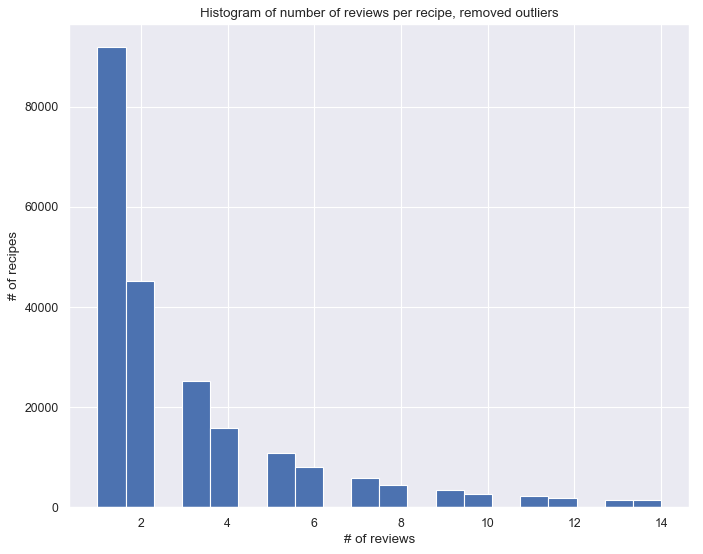

In [47]:
n_of_reviews_per_recipe = raw_interactions.groupby(["recipe_id"]).agg('count')["user_id"]
q_095 = n_of_reviews_per_recipe.quantile(0.95)
fig = plt.figure(figsize = (10,8), dpi = 80)
ax = fig.add_subplot(111)
plt.hist(n_of_reviews_per_recipe.loc[n_of_reviews_per_recipe < q_095], bins = 20)
ax.set_title("Histogram of number of reviews per recipe, removed outliers")
ax.set_xlabel("# of reviews")
ax.set_ylabel("# of recipes")

### Dispersion in ratings per recipe

In [10]:
std_of_ratings_per_recipe = raw_interactions.groupby(["recipe_id"]).agg({"rating":np.std})

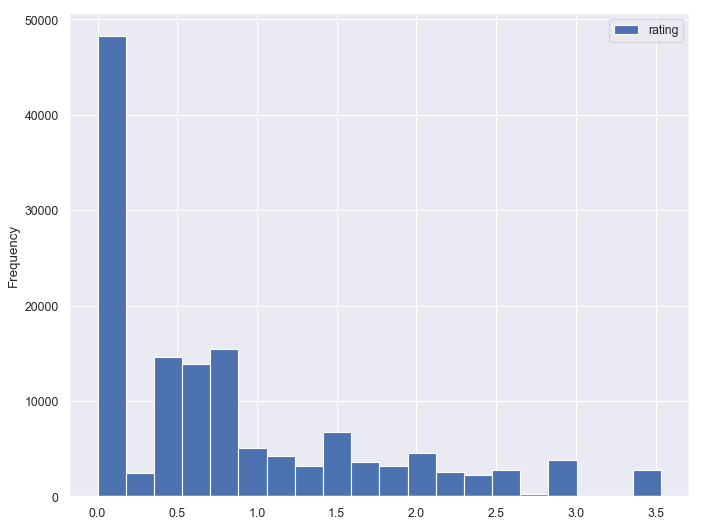

In [31]:
plt.figure(figsize = (10,8), dpi = 80)
std_of_ratings_per_recipe.plot(kind = 'hist', bins = 20, ax = plt.gca())

In [45]:
np.std([0,5])

2.5